<a href="https://colab.research.google.com/github/tbradshaw91/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

## **Load the data as a pandas dataframe**

In [2]:
!pip install seaborn==0.9.0

In [0]:
import requests

def attributes(names: str):
    r = requests.get(names)
    
    attr_found, blank_count = [False] * 2
    attrs = {}
    for i, line in enumerate(r.text.split('\n')):
        if 'Attribute Information' in line:
            attr_found = True
            continue
        if attr_found and not line:
            blank_count += 1

            if blank_count==2:
                break

            continue
        if attr_found:
            attr = (line.replace('  ', '')
                        .replace('\t', '')
                        .replace('.', '').split(':'))
            attrs[attr[0]] = attr[1]

    return attrs

In [0]:
import pandas as pd
import numpy as np

names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names'
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

attrs = attributes(names)
credit_data = pd.read_csv(data, names=attrs.keys())

In [8]:
credit_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## **Validate that it has the appropriate number of observations**


*   Check the raw file OR
*   Read the DS description from UCI 



In [9]:
# Ok, same size
credit_data.shape

(690, 16)

In [10]:
credit_data.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


### **Verifying the attributes match**




In [11]:
attrs

{'A1': 'b, a',
 'A10': 't, f',
 'A11': 'continuous',
 'A12': 't, f',
 'A13': 'g, p, s',
 'A14': 'continuous',
 'A15': 'continuous',
 'A16': ' +,- (class attribute)',
 'A2': 'continuous',
 'A3': 'continuous',
 'A4': 'u, y, l, t',
 'A5': 'g, p, gg',
 'A6': 'c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff',
 'A7': 'v, h, bb, j, n, z, dd, ff, o',
 'A8': 'continuous',
 'A9': 't, f'}

## **There should be missing data. Check for it and change it so pandas recognizes as NA**

**Checking the NaNs** 

In [8]:
# It shows there are no Missing Values, but I can see in the DF above that there are.
# The Missing Values are represented by ? which is why they are not showing up
credit_data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
# Replacing the ? with NaNs so they don't slip through the cracks
credit_data = credit_data.replace({'?':np.nan})

In [10]:
# There we go
credit_data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

## **Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary**

In [0]:
for col in credit_data:
    if attrs[col]=='continuous':
        credit_data[col] = pd.to_numeric(credit_data[col], downcast='float')

In [27]:
# The previous continuous attributes were 
# A11, A14, A15, A2, A3, A8
# All of which are now appearing as floats, not sure what this question is asking. 

credit_data.dtypes

A1      object
A2     float32
A3     float32
A4      object
A5      object
A6      object
A7      object
A8     float32
A9      object
A10     object
A11    float32
A12     object
A13     object
A14    float32
A15    float32
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

### **Explore the data using whatever approach to get an impression of the distributions and relationships of the variables. The goal is to understand how the features are different when grouped by the two class labels. **

In [43]:
# First step, split the class labels 

positive = credit_data[credit_data['A16'] == '+']
positive.shape

(307, 16)

In [36]:
negative = credit_data[credit_data['A16'] == '-']
negative.shape

(383, 16)

In [107]:
# Crosstab examining how + and - are distributed between a and b
A1_crosstab = pd.crosstab(credit_data['A16'],credit_data['A1'], dropna=True)
A1_crosstab

A1,a,b
A16,,
+,98,206
-,112,262


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats

In [108]:
stats.chi2_contingency(A1_crosstab)

(0.31128326491619945,
 0.5768937883001117,
 1,
 array([[ 94.15929204, 209.84070796],
        [115.84070796, 258.15929204]]))

### **For the 6 contin. features, how are they different when split between the two class labels? **

In [74]:
# Classifying my cols to ref later
continuous_feats=['A2','A3','A8','A11','A14','A15']
categorical_feats=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
extra_cols=['A9','A10','A12']

# Examining the 6 continuous features
print("P-value < 0.05")
print("Col",".........","Statistic",".............", "P-value")
for i in continuous_feats:
  stat, pvalue = stats.ttest_ind(positive[i], negative[i], nan_policy='omit', equal_var=False)
  if pvalue < 0.05: print(i,"       ", stat,"       ", pvalue)
print("")

print("P-value > 0.05")
print("Col",".........","Statistic",".............", "P-value")
for i in continuous_feats:
  stat, pvalue = stats.ttest_ind(positive[i], negative[i], nan_policy='omit', equal_var=False)
  if pvalue > 0.05: print(i,"       ", stat,"       ", pvalue)
print("")

P-value < 0.05
Col ......... Statistic ............. P-value
A2         4.224491706510129         2.7673757443248504e-05
A3         5.392532167867879         1.0158739668297299e-07
A8         8.380059445850803         7.42538358526361e-16
A11         10.638418482070332         4.310274591722058e-23
A14         -2.6696493137915973         0.0077778250827957
A15         4.196600551709692         3.5433752049352505e-05

P-value > 0.05
Col ......... Statistic ............. P-value



**Displaying some continous features to show split**

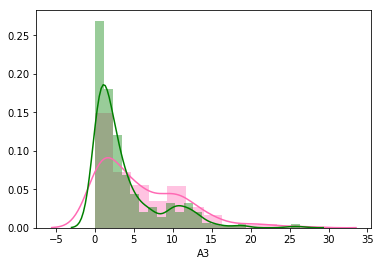

In [69]:
# A3 DF
sns.distplot( positive['A3'] , color="hotpink", label="positve");
sns.distplot( negative['A3'] , color="green", label="negative");

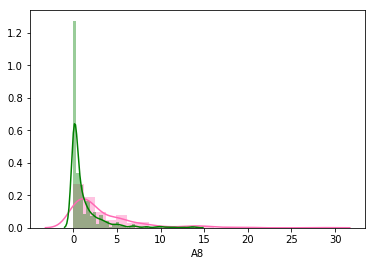

In [75]:
# A8
sns.distplot( positive['A8'] , color="hotpink", label="positve");
sns.distplot( negative['A8'] , color="green", label="negative");

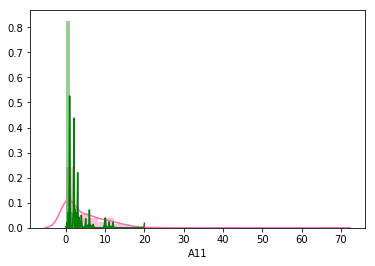

In [76]:
# A11
sns.distplot( positive['A11'] , color="hotpink", label="positve");
sns.distplot( negative['A11'] , color="green", label="negative");

### **Choose two features to run t-tests (again split by class label) - specifically, select one feature that is extremely different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.**

A11
p  4.310274591722058e-23
t   10.638418482070332
dof 690


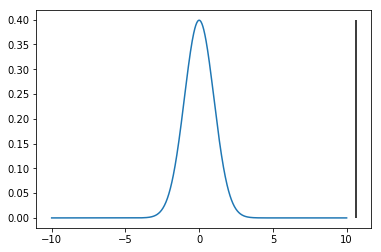

A14
p  0.0077778250827957
t   -2.6696493137915973
dof 690


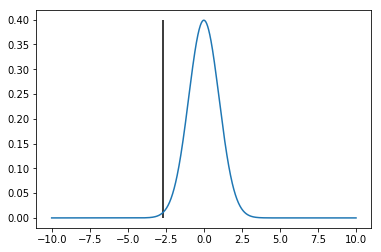

In [58]:
# A14 and A11 have the largest variance based on the information above
for col in ['A11', 'A14']:
    t_stat, p = stats.ttest_ind(credit_data.loc[credit_data['A16']=='+', col],
                                credit_data.loc[credit_data['A16']=='-', col],
                                nan_policy='omit',
                                equal_var=False)
    dof = len(credit_data['A16'].dropna())
    print(col, f'p  {p}', f't   {t_stat}', f'dof {dof}', sep='\n')
    
    x = np.linspace(-10,10,1000)
    y = stats.t(dof).pdf(x)
    plt.plot(x, y)
    plt.vlines(x=t_stat, ymin=0, ymax=max(y))
    plt.show();

A15
p  3.5433752049352505e-05
t   4.196600551709692
dof 690


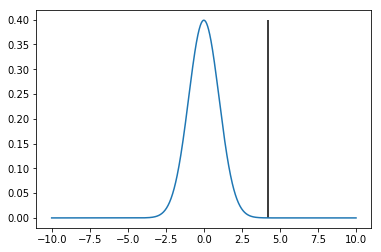

A8
p  7.42538358526361e-16
t   8.380059445850803
dof 690


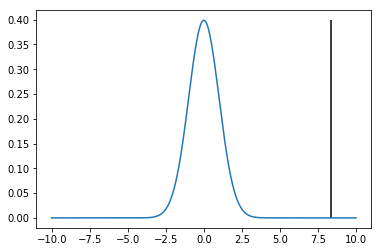

In [59]:
# A15 and A8 are the appear the have the closest 
for col in ['A15', 'A8']:
    t_stat, p = stats.ttest_ind(credit_data.loc[credit_data['A16']=='+', col],
                                credit_data.loc[credit_data['A16']=='-', col],
                                nan_policy='omit',
                                equal_var=False)
    dof = len(credit_data['A16'].dropna())
    print(col, f'p  {p}', f't   {t_stat}', f'dof {dof}', sep='\n')
    
    x = np.linspace(-10,10,1000)
    y = stats.t(dof).pdf(x)
    plt.plot(x, y)
    plt.vlines(x=t_stat, ymin=0, ymax=max(y))
    plt.show();

### **For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. **



In [0]:
#categorical_feats=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
# I already demonstrated A1 above
# I was confused by what this was asking for specifically, so I individually represented each column. Sorry for all the repetativeness. 

In [80]:
A4_crosstab = pd.crosstab(credit_data['A16'],credit_data['A4'])
A4_crosstab

A4,l,u,y
A16,,,
+,2,256,45
-,0,263,118


In [86]:
stats.chi2_contingency(A4_crosstab)

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[  0.88596491, 229.90789474,  72.20614035],
        [  1.11403509, 289.09210526,  90.79385965]]))

In [81]:
A5_crosstab = pd.crosstab(credit_data['A16'],credit_data['A5'])
A5_crosstab

A5,g,gg,p
A16,,,
+,256,2,45
-,263,0,118


In [87]:
stats.chi2_contingency(A5_crosstab)

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[229.90789474,   0.88596491,  72.20614035],
        [289.09210526,   1.11403509,  90.79385965]]))

In [82]:
A6_crosstab = pd.crosstab(credit_data['A16'],credit_data['A6'])
A6_crosstab

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6


In [88]:
stats.chi2_contingency(A6_crosstab)

(98.32520342679135,
 3.4999300402715717e-15,
 13,
 array([[24.02643172, 60.95594714, 18.24229075, 13.34801762, 11.12334802,
         23.5814978 , 26.25110132,  4.44933921, 22.69162996, 16.90748899,
         34.70484581,  1.33480176, 28.47577093, 16.90748899],
        [29.97356828, 76.04405286, 22.75770925, 16.65198238, 13.87665198,
         29.4185022 , 32.74889868,  5.55066079, 28.30837004, 21.09251101,
         43.29515419,  1.66519824, 35.52422907, 21.09251101]]))

In [89]:
A7_crosstab = pd.crosstab(credit_data['A16'],credit_data['A7'])
A7_crosstab

A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


In [94]:
stats.chi2_contingency(A7_crosstab)

(45.034207140240554,
 3.625452872372267e-07,
 8,
 array([[ 26.25110132,   2.66960352,  25.36123348,  61.40088106,
           3.55947137,   1.77973568,   0.88986784, 177.52863436,
           3.55947137],
        [ 32.74889868,   3.33039648,  31.63876652,  76.59911894,
           4.44052863,   2.22026432,   1.11013216, 221.47136564,
           4.44052863]]))

In [90]:
A9_crosstab = pd.crosstab(credit_data['A16'],credit_data['A9'])
A9_crosstab

A9,f,t
A16,,
+,23,284
-,306,77


In [95]:
stats.chi2_contingency(A9_crosstab)

(355.2038167412799,
 3.1185900878457007e-79,
 1,
 array([[146.38115942, 160.61884058],
        [182.61884058, 200.38115942]]))

In [91]:
A10_crosstab = pd.crosstab(credit_data['A16'],credit_data['A10'])
A10_crosstab

A10,f,t
A16,,
+,98,209
-,297,86


In [96]:
stats.chi2_contingency(A10_crosstab)

(143.06956205083145,
 5.675727374527571e-33,
 1,
 array([[175.74637681, 131.25362319],
        [219.25362319, 163.74637681]]))

In [92]:
A12_crosstab = pd.crosstab(credit_data['A16'],credit_data['A12'])
A12_crosstab

A12,f,t
A16,,
+,161,146
-,213,170


In [97]:
stats.chi2_contingency(A12_crosstab)

(0.568273300792113,
 0.45094587758631943,
 1,
 array([[166.40289855, 140.59710145],
        [207.59710145, 175.40289855]]))

In [93]:
A13_crosstab = pd.crosstab(credit_data['A16'],credit_data['A13'])
A13_crosstab

A13,g,p,s
A16,,,
+,287,5,15
-,338,3,42


In [98]:
stats.chi2_contingency(A13_crosstab)

(9.191570451545383,
 0.010094291370456362,
 2,
 array([[278.07971014,   3.55942029,  25.36086957],
        [346.92028986,   4.44057971,  31.63913043]]))

###**There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.**

In [0]:
#categorical_feats=['A1','A4','A5','A6','A7','A9','A10','A12','A13']

In [105]:
def extreme_chi2(one_col,cols,credit_data):
 
  for i in cols:
    ct=pd.crosstab(credit_data[one_col], credit_data[i])
    if stats.chi2_contingency(ct)[1] < .05:
      print("---------------------")
      print(ct)
      print("---------------------")
      print("Chi2 of A16 Crosstab", i,":")
      print("Chi2 Statistics,", "P-Values,", "Degrees of Freedom,", "Expected Frequencys")
      print(stats.chi2_contingency(ct))
      print("")

extreme_chi2('A16',categorical_feats,credit_data)

---------------------
A4   l    u    y
A16             
+    2  256   45
-    0  263  118
---------------------
Chi2 of A16 Crosstab A4 :
Chi2 Statistics, P-Values, Degrees of Freedom, Expected Frequencys
(26.234074966202144, 2.010680204180363e-06, 2, array([[  0.88596491, 229.90789474,  72.20614035],
       [  1.11403509, 289.09210526,  90.79385965]]))

---------------------
A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
---------------------
Chi2 of A16 Crosstab A5 :
Chi2 Statistics, P-Values, Degrees of Freedom, Expected Frequencys
(26.234074966202144, 2.010680204180363e-06, 2, array([[229.90789474,   0.88596491,  72.20614035],
       [289.09210526,   1.11403509,  90.79385965]]))

---------------------
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
---------------------
Chi2 o

In [106]:
def not_extremechi2(one_col,cols,credit_data):

  for i in cols:
    ct=pd.crosstab(credit_data[one_col], credit_data[i])
    if stats.chi2_contingency(ct)[1] > .05:
      print("---------------------")
      print(ct)
      print("---------------------")
      print("Chi2 of A16 Crosstab", i,":")
      print("Chi2 Statistics,", "P-Values,", "Degrees of Freedom,", "Expected Frequencys")
      print(stats.chi2_contingency(ct))
      print("")
not_extremechi2('A16',categorical_feats,credit_data)


---------------------
A1     a    b
A16          
+     98  206
-    112  262
---------------------
Chi2 of A16 Crosstab A1 :
Chi2 Statistics, P-Values, Degrees of Freedom, Expected Frequencys
(0.31128326491619945, 0.5768937883001117, 1, array([[ 94.15929204, 209.84070796],
       [115.84070796, 258.15929204]]))

---------------------
A12    f    t
A16          
+    161  146
-    213  170
---------------------
Chi2 of A16 Crosstab A12 :
Chi2 Statistics, P-Values, Degrees of Freedom, Expected Frequencys
(0.568273300792113, 0.45094587758631943, 1, array([[166.40289855, 140.59710145],
       [207.59710145, 175.40289855]]))



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels**

For this, I ran 4 t-tests out of curiousity. 

For the sake of time I will just focus on 2



A11
p  4.310274591722058e-23
t   10.638418482070332
dof 690


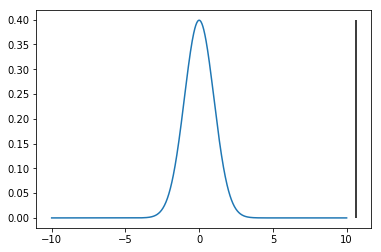

A14
p  0.0077778250827957
t   -2.6696493137915973
dof 690


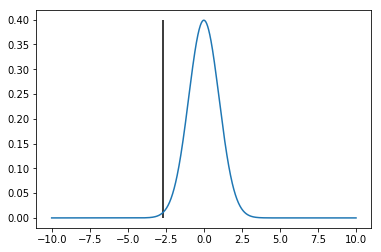

In [109]:
# A14 and A11 have the largest variance based on the information above
for col in ['A11', 'A14']:
    t_stat, p = stats.ttest_ind(credit_data.loc[credit_data['A16']=='+', col],
                                credit_data.loc[credit_data['A16']=='-', col],
                                nan_policy='omit',
                                equal_var=False)
    dof = len(credit_data['A16'].dropna())
    print(col, f'p  {p}', f't   {t_stat}', f'dof {dof}', sep='\n')
    
    x = np.linspace(-10,10,1000)
    y = stats.t(dof).pdf(x)
    plt.plot(x, y)
    plt.vlines(x=t_stat, ymin=0, ymax=max(y))
    plt.show();

In A11, there were more positive observations made, 
In A 14, more negative observations were made. 

The Chi-Square tests were created on a crosstab of A16 and all other categorical features to see if the samples are independamt. 

I noticed that all tests except for crosstab table between A16 with A1 and A16 with A12 were significant with p-value < 0.05.


The most challenging part of this challenge was the freedom we were given to make observations and the time constriaint.